<p style="font-family: Arial; font-size:3.75em;color:black; font-style:bold"><br>
Linear Regression
</p><br>

Reference: https://github.com/leventbass/linear_regression

조교
- 이정수 (KAIST AI 석사과정): bebeto@kaist.ac.kr
- 이상현 (KAIST AI 박사과정): shlee6825@kaist.ac.kr


<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">
    
## Library 설치 및 dataset 준비

In [1]:
!pip install scikit-learn
!pip install matplotlib

In [2]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [3]:
dataset = load_boston()

X = dataset.data
y = dataset.target[:,np.newaxis] # np.newaxis는 (506,)인것을 (506,1)로 만들기 위함 -> 원래는 row vector로 되어있던 것을 column vector처럼 사용하기 위함 
print("Total samples in our dataset is: {}".format(X.shape[0]))

Total samples in our dataset is: 506


<span style="font-family:Helvetica ;font-size: 14px; line-height:2.2">
    
## 우리가 사용할 함수 선언

In [4]:
def compute_cost(X, y, params): # params가 곧 𝜃라고 생각하자 
    n_samples = len(y)
    h = X @ params # h는 X와 params의 내적. @는 내적 연산자
    # numpy로 내적을 표현하는 방법: https://stackoverflow.com/questions/34142485/difference-between-numpy-dot-and-python-3-5-matrix-multiplication
    return (1/(2*n_samples))*np.sum((h-y)**2)

h: hypothesis를 의미. 즉, $h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$
<br>
cost: $\frac{1}{2N}\Sigma^{N}_{i=1}(h(x_{i})-y_{i})^2$

In [5]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1)) # J_history = J(x) = cost
    
    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

Gradient update
<br>
$\theta = \theta - \alpha \frac{\partial J(x)}{\partial \theta}$
<br>
$J(x)= \frac{1}{2N}\Sigma^{N}_{i=1}(h(x_{i})-y_{i})^2$
<br>
$J(x)= \frac{1}{2N}[(h(x_1)-y_1)^2 + (h(x_2)-y_2)^2 + (h(x_3)-y_3)^2 + ... + (h(x_n)-y_n)^2)]$
<br>
$\frac{\partial J(x)}{\partial \theta_i} = 2\frac{1}{2N}(h(x_i)-y_i)(x_i) $

In [6]:
n_samples = len(y)
mu = np.mean(X, 0)
sigma = np.std(X, 0)

print(n_samples)
print(mu)
print(sigma)

506
[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]
[8.59304135e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
 7.13400164e+00]


In [7]:
print('before normalization')
print(X)
X = (X-mu) / sigma
print('after normalization: ')
print(X)

before normalization
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
after normalization: 
[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


Boston dataset 설명: https://thatascience.com/learn-machine-learning/boston-dataset/

Standardization 해줘야하는 이유에 대한 설명: # https://www.datasklr.com/ols-least-squares-regression/scaling-centering-and-standardization

In [8]:
X = np.hstack((np.ones((n_samples,1)),X)) # bias term 때문에 1로 구성된 열벡터를 추가
n_features = np.size(X,1)
params = np.zeros((n_features,1))

In [9]:
print(X.shape)
print(params.shape)
print(n_features)

(506, 14)
(14, 1)
14


In [10]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

Initial cost is:  296.0734584980237 



In [11]:
(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1]) # [-1]은 마지막 element 

Optimal parameters are: 
 [[22.53279993]
 [-0.83980839]
 [ 0.92612237]
 [-0.17541988]
 [ 0.72676226]
 [-1.82369448]
 [ 2.78447498]
 [-0.05650494]
 [-2.96695543]
 [ 1.80785186]
 [-1.1802415 ]
 [-1.99990382]
 [ 0.85595908]
 [-3.69524414]] 

Final cost is:  [11.00713381]


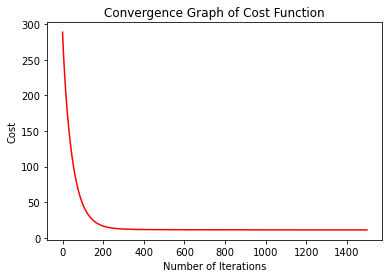

In [12]:
plt.plot(range(len(J_history)), J_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()


## Linear Regression를 클래스화 하기 

R_square 설명: https://m.blog.naver.com/tlrror9496/222055889079

In [15]:
class LinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones((self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef_ = None
        self.intercept_ = None

    def fit(self):

        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]
        return self

    def score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum()) # 1 - 잔차 

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params

In [16]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd


dataset = load_boston()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

(354, 13) (152, 13)


In [17]:
regressor = LinearRegression(X_train, y_train).fit()
train_accuracy = regressor.score()
test_accuracy = regressor.score(X_test, y_test)

print('train accuracy: ', train_accuracy)
print('test accuracy: ', test_accuracy)

train accuracy:  0.7434822344695982
test accuracy:  0.6753466437353817
